## **CLASSIFICATION PREDICTIVE PERFORMANCE**

We will look at the metrics:

* confusion matrix
* accuracy
* error
* sensitivity
* specificity
* false negative rate
* precision
* F1 Score

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/fraud_small.csv')
df.head()

,cc_num,amt,gender,category,is_fraud
0,213199865312311,49.32,M,gas_transport,0
1,4474324669797121,144.14,M,grocery_pos,0
2,6011860238257910,63.24,F,gas_transport,0
3,180048185037117,129.18,F,misc_pos,0
4,4584931703207308232,48.83,F,home,0


In [2]:
## missing values
df.isnull().sum()

,0
cc_num,0
amt,0
gender,0
category,0
is_fraud,0


In [3]:
## drop cc_num
df.drop('cc_num', axis=1, inplace=True)

In [4]:
df.head()

,amt,gender,category,is_fraud
0,49.32,M,gas_transport,0
1,144.14,M,grocery_pos,0
2,63.24,F,gas_transport,0
3,129.18,F,misc_pos,0
4,48.83,F,home,0


In [5]:
for i in df.select_dtypes(include='object'):
    print(f'Variable {i} has {df[i].nunique()} levels')

Variable gender has 2 levels
Variable category has 14 levels


In [6]:
## dummy encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,amt,is_fraud,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,49.32,0,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1,144.14,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,63.24,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,129.18,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,48.83,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [7]:
## Create X and y
X = df.drop('is_fraud', axis = 1)
y = df['is_fraud']

In [8]:
## check value_counts
## 50% frauds, 50% non-frauds (perfectly balanced)
## This data set was created by keeping ALL the frauds and sampling the non-frauds to match the number of frauds
y.value_counts()

,count
is_fraud,
0,100
1,100


#### **Logistic Regression**

In [9]:
## split into 70% training and 30% test (random_state = 13)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [12]:
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression(max_iter = 500)

## fit on training set
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
## y_pred (predictions)
y_pred = lr.predict(X_test)
y_pred[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [16]:
## p_hat (propensities)
## if y is encoded as 0 and 1
p_hat = lr.predict_proba(X_test)[:,1]
p_hat[:10]

array([0.77038494, 0.98071001, 0.22910674, 0.85465717, 0.19734086,
       0.29820768, 0.37428594, 0.27803845, 0.99995515, 0.11021466])

In [17]:
## decision function
lr.decision_function(X_test)[:10]

array([ 1.21048608,  3.92869029, -1.21336193,  1.77160516, -1.40299763,
       -0.85584734, -0.51387343, -0.95421247, 10.0121191 , -2.08855037])

**Confusion Matrix**

We need `y_pred`.

In [18]:
y_pred[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [20]:
y_test[:10].values

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [21]:
## sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## numpy array
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 5, 25]])

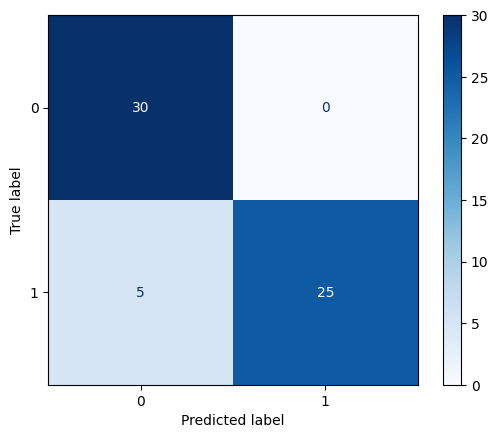

In [23]:
## Nicer confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues");

**Accuracy**

In [24]:
## accuracy = (TP + TN) / n
n = 30+0+5+25
(30 + 25) / n

0.9166666666666666

In [25]:
## sklearn
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9166666666666666

**Error / Misclassification**

In [26]:
## sklearn has no error function
1 - accuracy_score(y_test, y_pred)

0.08333333333333337

**Recall**

Ability to detect the class of interest

In [27]:
## 1) determine how many 1s in total = 30
## 2) how many of those were predicted correctly = 25
## recall = TP / (FN + TP)
25 / 30

0.8333333333333334

In [28]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.8333333333333334

**Specificity**

In [29]:
## 1) determine how manys 0s in total = 30
## 2) how many of them were predicted 0s: 30
## specificity = TN / (TN + FP)
30 / 30

1.0

In [31]:
## sklearn does NOT specificity
## NOT a very common metric to use
from imblearn.metrics import specificity_score

specificity_score(y_test, y_pred)

1.0

In [32]:
## 1-specificity
## called the false positive rate (fpr)
1 - specificity_score(y_test, y_pred)

0.0

**Precision**

In [33]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

1.0

**F1 Score**

In [34]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9090909090909091

In [35]:
## Accuracy and F1 Score summarizes well the performance of a model
## if the data is BALANCED

## **METRICS IN IMBALANCED DATA SETS**

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/fraud_small_imbalanced.csv')
df.head()

,cc_num,amt,gender,category,is_fraud
0,2.291160e+15,2.86,M,personal_care,0.0
1,3.573030e+15,29.84,F,personal_care,0.0
2,3.598220e+15,41.28,F,health_fitness,0.0
3,3.591920e+15,60.05,M,misc_pos,0.0
4,3.526830e+15,3.19,M,travel,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130147 entries, 0 to 130146
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    130147 non-null  float64
 1   amt       130147 non-null  float64
 2   gender    130147 non-null  object 
 3   category  130147 non-null  object 
 4   is_fraud  130146 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.0+ MB


In [39]:
## 0.4% of transactions are fraudulent
df['is_fraud'].value_counts() / len(df)

,count
is_fraud,
0.0,0.995951
1.0,0.004042


In [40]:
## missing values
df.isnull().sum()

,0
cc_num,0
amt,0
gender,0
category,0
is_fraud,1


In [41]:
## drop missing
df.dropna(inplace=True)

In [42]:
## drop cc_num
df.drop('cc_num', axis=1, inplace=True)

In [43]:
## dummy encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,amt,is_fraud,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,0.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [44]:
## Create X and y
X = df.drop('is_fraud', axis = 1)
y = df['is_fraud']

In [45]:
## split into 80% training and 20% test (random_state = 13)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## **MODELING**

In [46]:
## FIT A LOGISTIC REGRESSION
## max_iter
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression(max_iter = 500)

## fit
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [47]:
## predictions
y_pred = lr.predict(X_test)

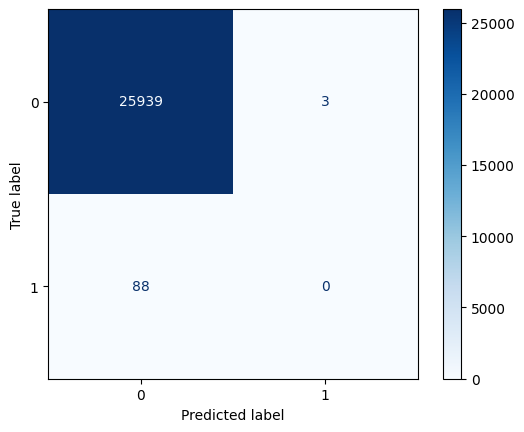

In [48]:
## confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues");

In [49]:
## accuracy score
## DOES NOT WORK WELL WITH IMBALANCED DATA
accuracy_score(y_test, y_pred)

0.9965040338071456

In [50]:
## detection rate
recall_score(y_test, y_pred)

0.0

In [51]:
## precision
precision_score(y_test, y_pred)

0.0

In [52]:
## specificity
specificity_score(y_test, y_pred)

0.9998843574126899

In [53]:
## there is balanced_accuracy_score
## compare against 50% (binary)
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.49994217870634494

In [ ]:
## Should a different threshold be used?
## instead of 50% (default)

## **Propensitity Modeling**

We want to work with `p_hat` to determine thresholds or rank-order the propensities.

In [54]:
p_hat = lr.predict_proba(X_test)[:,1]
p_hat

array([0.00365152, 0.00219515, 0.00248359, ..., 0.00248292, 0.01017394,
       0.0024949 ])